<a href="https://colab.research.google.com/github/zhukuixi/Udacity_DataScientistNanoDegree/blob/main/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

In [25]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("/content/survey-results-public.csv")
schema = pd.read_csv("/content/survey-results-schema.csv")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Q1: How to break into the field? - CousinEduaction

Check the description of CousinEduaction 

In [32]:
print(schema.loc[schema.Column == 'CousinEducation','Question'].values)

["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which

In [17]:
cous_ed_vals = df.CousinEducation.value_counts()

In [18]:
cous_ed_vals

Take online courses; Buy books and work through the exercises                                         711
Take online courses                                                                                   551
None of these                                                                                         523
Take online courses; Part-time/evening courses; Buy books and work through the exercises              479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises    465
                                                                                                     ... 
Master's degree; Contribute to open source; Part-time/evening courses; Participate in hackathons        1
Return to college; Participate in online coding competitions; Conferences/meet-ups; Other               1
Return to college; Get a job as a QA tester; Participate in hackathons; Other                           1
Return to college; Participate in hackathons; 

We see that each row of CousinEducation contains many methods separated 
by a delimiter ";".   
Thus we need to separate the methods.

In [23]:
# I create a function to count the method within CousinEducation column
def fun(df,title,plot):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot

        plot - bool providing whether or not you want a plot back

    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
		# Separate methods
    methods=[ele for row in list(df.CousinEducation.dropna().str.split(";")) for ele in row ] 
    cous_ed_vals = pd.Series(methods).str.strip().value_counts()

		# Get the percentage of each method
    cous_ed_vals = cous_ed_vals/cous_ed_vals.sum()		
    study_df = cous_ed_vals.reset_index()
    study_df.columns=["method","percent"]
    study_df.set_index('method',inplace=True)
    if plot:
        study_df.plot(kind="bar",legend=None)
        plt.title(title)
        plt.show()
    return study_df

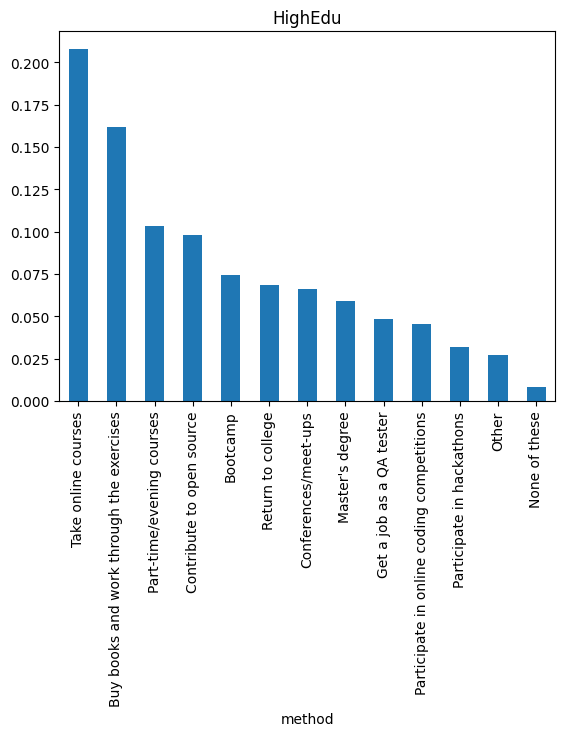

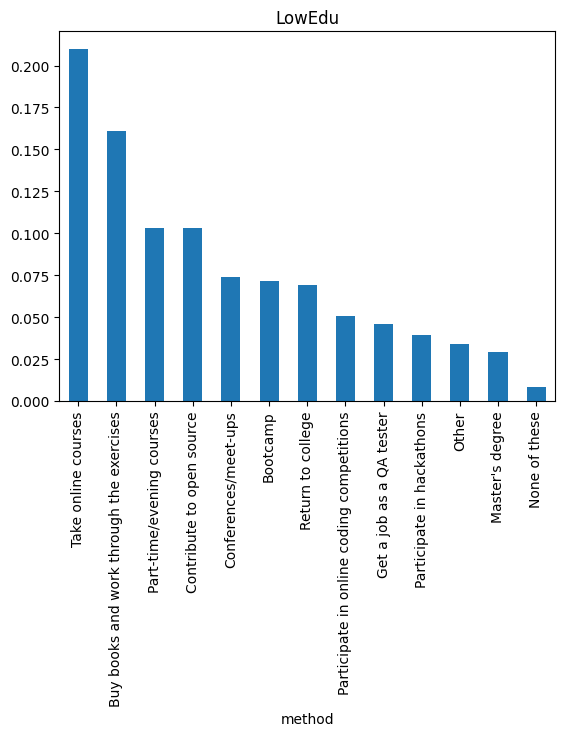

,percent_high,percent_low,Diff
method,,,
Bootcamp,0.074617,0.071824,-0.002793
Buy books and work through the exercises,0.162073,0.161205,-0.000868
Conferences/meet-ups,0.065842,0.073920,0.008078
Contribute to open source,0.097821,0.103230,0.005409
Get a job as a QA tester,0.048469,0.045739,-0.002730
Master's degree,0.058952,0.029346,-0.029606
None of these,0.008363,0.008277,-0.000086
Other,0.026973,0.033861,0.006888
Part-time/evening courses,0.103298,0.103248,-0.000050


In [24]:
# Get low and high education df respectively
df_highEdu = df[df.FormalEducation.isin(["Master's degree", "Professional degree"])]
df_lowEdu = df[~df.FormalEducation.isin(["Master's degree", "Professional degree"])]
# Obtain the method percentage in each group
highEdu_per = fun(df_highEdu,"HighEdu",True)
lowEdu_per = fun(df_lowEdu,"LowEdu",True)
# Combine and draw the barplot
combine_per = highEdu_per.join(lowEdu_per,how="outer",lsuffix="_high",rsuffix="_low")
combine_per.fillna(0,inplace=True)
combine_per['Diff'] = combine_per.percent_low - combine_per.percent_high
combine_per.style.bar(subset=['Diff'], align='mid', color=['#d65f5f', '#5fba7d'])